In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats, integrate
from scipy.stats import ttest_ind
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import re

In [7]:
##### CAP LOG2FOLD

# df = 38055 rows
df = pd.read_csv("CAP_salmon_norm.csv")
df['gene_id'] = df['gene_id'].str.split('.').str[0]

en = pd.read_csv("mart_export.txt", sep="\t")
en = en.rename(columns = {'Gene stable ID':'gene_id'})
df_new = pd.merge(df, en, on='gene_id')

# 37929 rows
cols = list(df_new)
cols = cols[:1] +cols[-2:] + cols[1:-2]
df_new = df_new[cols]
df_new.drop_duplicates()
#df_new.to_csv("CAP_salmon_norm_gene.csv", index=False)
df_new['H/C'] = (df_new['H_1104_CAP_mRNASeq']+ df_new['H_1105_CAP_mRNASeq'])/(df_new['C_0113_CAP_mRNASeq']+ df_new['C_0114_CAP_mRNASeq'])
df_new['Log2FC'] = np.log2(df_new['H/C'])
cols = list(df_new)
cols = cols[:3] + cols[-2:] + cols[3:-2]
df_new = df_new[cols]
#df_new1 = df_new1.sort_values(['Log2FC'], ascending=[False])

# genes are doubled or halved, 3996 rows
df_new2 = df_new[(df_new.Log2FC > 1) | (df_new.Log2FC < -1)]
df_new2 = df_new2.sort_values(['Log2FC'], ascending=[True])
df_new2

#df_new2.to_csv("CAP_log2FC.csv", index=False)
df_new2['gene_id'].to_csv("CAP_log2FC_genes.csv", index=False)

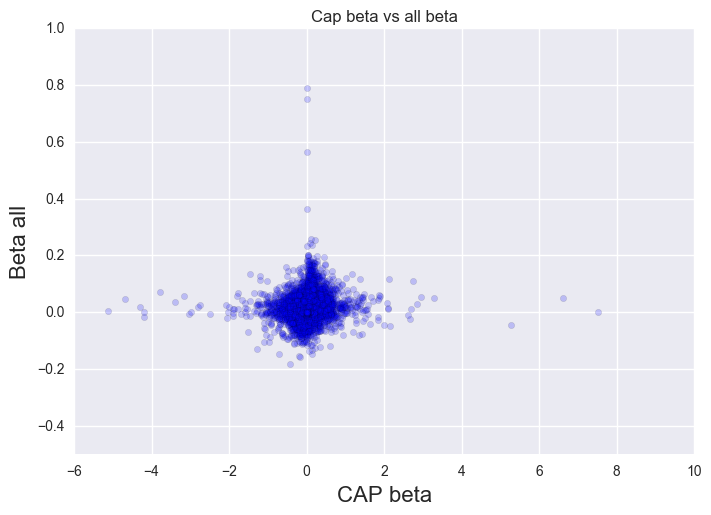

In [3]:
##### CAP COUNTS BETA

# df = 38055 rows
df = pd.read_csv("CAP_salmon_firth.csv")
#df.to_csv("CAP_salmon_firth.csv", index=False)
df = df.rename(columns = {'Unnamed: 0':'Genes'})
df['Genes'] = df['Genes'].str.split('.').str[0]

en = pd.read_csv("mart_export.txt", sep="\t")
en = en.rename(columns = {'Gene stable ID':'Genes'})
df_new = pd.merge(df, en, on='Genes')

# 37929 rows
columnsTitles = ['Genes', 'Gene name','HGNC symbol','counts__beta','counts__p','counts__padj','int__beta', 'int__p','int__padj','Subject.death__beta','Subject.death__padj']
df_new = df_new.reindex(columns=columnsTitles)

# order by counts beta
df2 = df_new.sort_values(['counts__beta'], ascending=[False])
#df_beta = df2[df2['counts__padj'] < 0.05]

# order by FDR values
df3 = df_new.sort_values(['counts__p'], ascending=[True])

# NO SIGNIFICANT VALUES FOUND
df_fdr = df3[df3['counts__padj'] < 0.05]
#### df_fdr is EMPTY 

#Compare the DE gene list from CAP samples to those from all samples (produce a scatter plot of beta 
#estimates for each gene)

# Drops other columns except counts_beta and gene name
# 37929 rows
CAP_beta = df_new.drop(df_new.columns[[2,4,5,6,7,8,9,10]], axis=1)
CAP_beta = CAP_beta.rename(columns = {'counts__beta':'CAP_beta'})

# 27881 rows
df_all = pd.read_csv("all_salmon_firth.csv")
df_all = df_all.rename(columns = {'Unnamed: 0':'Genes'})
df_all['Genes'] = df_all['Genes'].str.split('.').str[0]
#df_all2 = df_all.sort_values(['counts__beta'], ascending=[False])
all_beta = df_all[['Genes','counts__beta']]
all_beta = all_beta.rename(columns = {'counts__beta':'all_beta'})

# 27193 rows
merge_beta = pd.merge(CAP_beta, all_beta, on='Genes', how='inner')
merge_beta = merge_beta.drop_duplicates()
#merge_beta = merge_beta.drop_duplicates(subset=['Gene name', 'CAP_beta', 'all_beta'])

plt.scatter(merge_beta.CAP_beta, merge_beta.all_beta, alpha=0.2)
plt.axis([-6,10,-0.5,1])
plt.title("Cap beta vs all beta")
plt.xlabel("CAP beta", fontsize=16)
plt.ylabel("Beta all", fontsize=16)
plt.show()
#merge_beta.to_csv("merged_beta.csv", index=False)
#merge_beta

In [4]:
def dist(s):
    v0 = [0,0]
    v1 = [0,0]
    v2 = [0,0]
    v3 = [0,0]
    v4 = [0,0]
    v5 = [0,0]
    v6 = [0,0]
    v7 = [0,0]
    v8 = [0,0]
    v9 = [0,0]
    v10 = [0,0]
    v11 = [0,0]
    v12 = [0,0]
    v13 = [0,0]
    v14 = [0,0]
    v15 = [0,0]
    v16 = [0,0]
    v17 = [0,0]
    v18 = [0,0]
    v19 = [0,0]
    v20 = [0,0]
    for i in range(len(s)):
        for j in range(len(s[0])):
            var = s[i][j]
            if var < 0.0000000001:
                v0[j] += 1
            if var > 0.0000000001 and var < 0.000000001:
                v1[j] += 1
            if var > 0.000000001 and var < 0.00000001:
                v2[j] += 1
            if var > 0.00000001 and var < 0.0000001:
                v3[j] += 1
            if var > 0.0000001 and var < 0.000001:
                v4[j] += 1
            if var > 0.000001 and var < 0.00001:
                v5[j] += 1
            if var > 0.00001 and var < 0.0001:
                v6[j] += 1
            if var > 0.0001 and var < 0.001:
                v7[j] += 1
            if var > 0.001 and var < 0.01:
                v8[j] += 1
            if var > 0.01 and var < 0.1:
                v9[j] += 1
            if var > 0.1 and var < 1:
                v10[j] += 1
            if var > 1 and var < 10:
                v11[j] += 1
            if var > 10 and var < 100:
                v12[j] += 1
            if var > 100 and var < 1000:
                v13[j] += 1
            if var > 1000 and var < 10000:
                v14[j] += 1
            if var > 10000 and var < 100000:
                v15[j] += 1
            if var > 100000 and var < 1000000:
                v16[j] += 1
            if var > 1000000 and var < 10000000:
                v17[j] += 1
            if var > 10000000 and var < 100000000:
                v18[j] += 1
            if var > 100000000 and var < 1000000000:
                v19[j] += 1
            if var > 1000000000 and var < 10000000000:
                v20[j+1] += 1
    return (v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20)

H_1104    1.812881e-09
H_1105    1.151950e-03
dtype: float64
H_1104    8.870148e+07
H_1105    3.290511e+04
dtype: float64


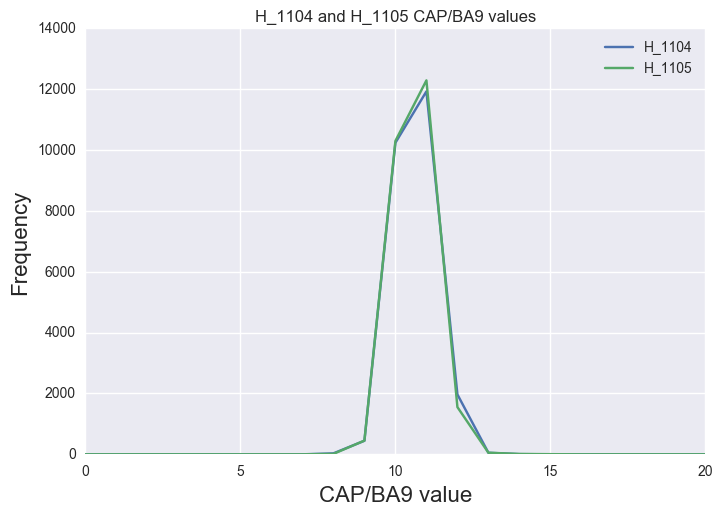

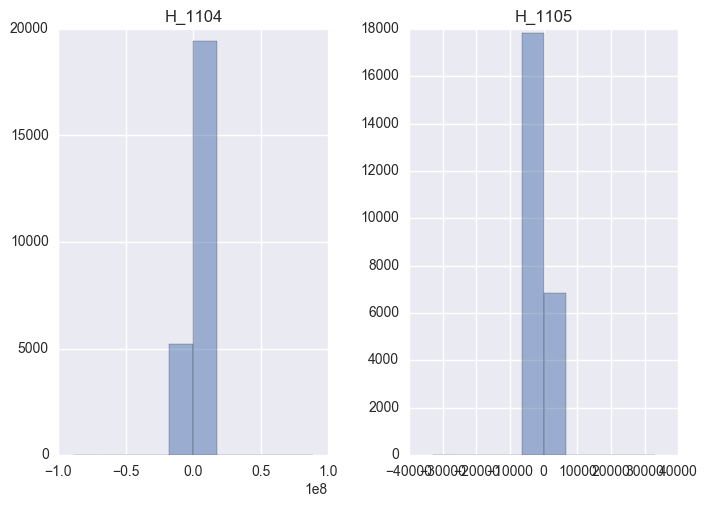

/Users/Mojito/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


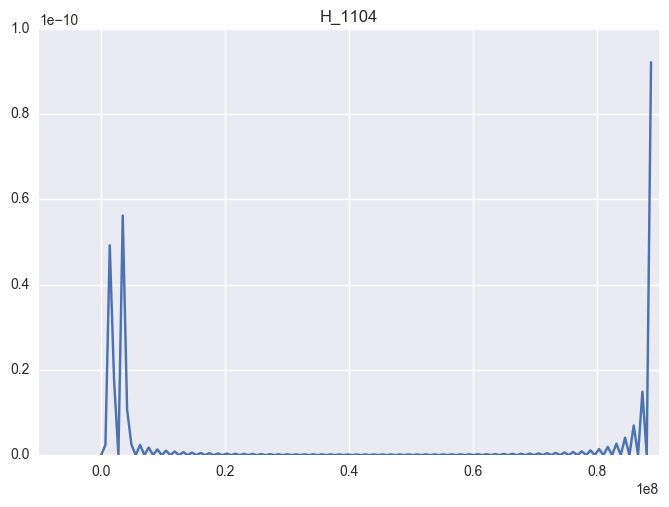

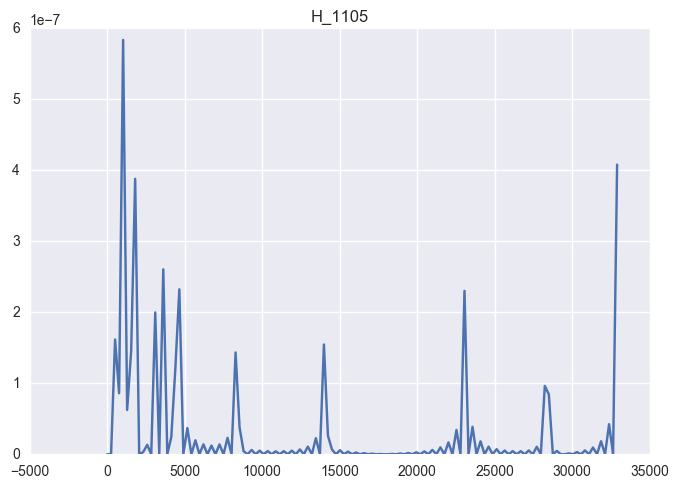

In [5]:
###### CAP RATIOS

# Read csv file
df1 = pd.read_csv("all_salmon_norm.csv")
df1.drop_duplicates()
# Pull out samples that we want
samples = ['H_1105_CAP_mRNASeq','H_1105_BA9_mRNASeq','H_1104_CAP_mRNASeq','H_1104_BA9_mRNASeq']
col = list(df1)
col = col[:1] + samples
df1 = df1[col]

#df['gene_id'] = df['gene_id'].str.split('.').str[0]
#df_new = pd.merge(df1, en, on='gene_id')

df1['H_1105'] = df1['H_1105_CAP_mRNASeq']/df1['H_1105_BA9_mRNASeq']
df1['H_1104'] = df1['H_1104_CAP_mRNASeq']/df1['H_1104_BA9_mRNASeq']
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()
df1 = df1[(df1 != 0).all(1)]

samp = ['H_1104','H_1105']
df2 = df1[samp]
print(df2.min())
print(df2.max())

var = df2.values.tolist()

v = pd.DataFrame(list(dist(var)))
v.columns = ['H_1104', 'H_1105']
v.plot()
plt.title("H_1104 and H_1105 CAP/BA9 values")
plt.xlabel("CAP/BA9 value", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

df2.diff().hist(alpha=0.5)
plt.show()

n = df2['H_1104'].as_matrix()
m = df2['H_1105'].as_matrix()
sns.distplot(n, hist=False)
plt.title("H_1104")
plt.show()
sns.distplot(m, hist=False)
plt.title("H_1105")
plt.show()

Total Var    10.143719
Ctrl Var      7.017499
HD Var       11.552236
dtype: float64
Total Var    8.557487e+11
Ctrl Var     7.260288e+11
HD Var       1.089649e+12
dtype: float64


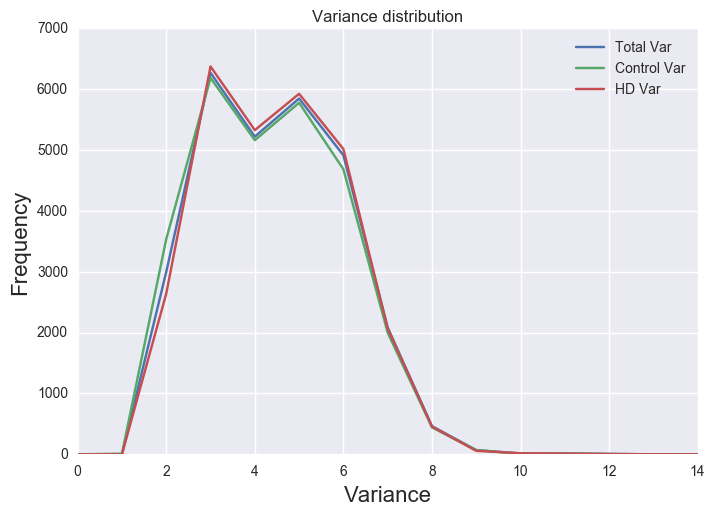

,Total Var,Ctrl Var,HD Var
0,3.047176e+06,1.795061e+06,5.176663e+06
1,3.029268e+10,2.716971e+10,3.645039e+10
2,4.233878e+05,1.580643e+05,8.944866e+05
3,2.072529e+09,8.249747e+08,4.170906e+09
4,1.088994e+10,5.339405e+09,2.075361e+10
5,1.654930e+03,1.857011e+03,1.318030e+03
6,1.184614e+09,6.922912e+08,2.085153e+09
7,1.599581e+03,1.507225e+03,1.772528e+03
8,4.945904e+10,3.980561e+10,6.701759e+10
9,5.728685e+11,4.085817e+11,8.773088e+11


In [6]:
###### ALL GENE VARIANCE

sample_info = pd.read_csv('HD_mRNASeq_sample_info.csv', sep=',', comment='#')

dataset_ids = sample_info['Dataset.dataset_id'].tolist()
control_ids = [ _ for _ in dataset_ids if _.startswith('C')]
HD_ids = [ _ for _ in dataset_ids if _.startswith('H')]

# Calculate variance of all samples, all control samples, all HD samples
df_var = pd.read_csv("all_salmon_norm.csv")
df_var['Total Var'] = df_var.var(axis=1)
df_var['Ctrl Var'] = df_var[control_ids].var(axis=1)
df_var['HD Var'] = df_var[HD_ids].var(axis=1)

# Pull variance columns out
cols = list(df_var)
cols = cols[-3:]
df_var2 = df_var[cols]

var_list = df_var2.values.tolist()
tot_var = df_var2['Total Var'].values.tolist()
ct_var = df_var2['Ctrl Var'].values.tolist()
hd_var = df_var2['HD Var'].values.tolist()

# Max and min of all each column
print(df_var2.min())
print(df_var2.max())

def dist_var2(s):
    v0 = [0,0,0]
    v1 = [0,0,0]
    v2 = [0,0,0]
    v3 = [0,0,0]
    v4 = [0,0,0]
    v5 = [0,0,0]
    v6 = [0,0,0]
    v7 = [0,0,0]
    v8 = [0,0,0]
    v9 = [0,0,0]
    v10 = [0,0,0]
    v11 = [0,0,0]
    v12 = [0,0,0]
    v13 = [0,0,0]
    v14 = [0,0,0]
    for i in range(len(s)):
        for j in range(len(s[0])):
            var = len(str(int(s[i][j])))
            if var == 0:
                v0[j] += 1
            if var == 1:
                v1[j] += 1
            if var == 2:
                v2[j] += 1
            if var == 3:
                v3[j] += 1
            if var == 4:
                v4[j] += 1
            if var == 5:
                v5[j] += 1
            if var == 6:
                v6[j] += 1
            if var == 7:
                v7[j] += 1
            if var == 8:
                v8[j] += 1
            if var == 9:
                v9[j] += 1
            if var == 10:
                v10[j] += 1
            if var == 11:
                v11[j] += 1
            if var == 12:
                v12[j] += 1
            if var == 13:
                v13[j] += 1
            if var == 14:
                v14[j] += 1
    return (v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14)

d = pd.DataFrame(list(dist_var2(var_list)))
d.columns = ['Total Var', 'Control Var', 'HD Var']
d.plot()
plt.title("Variance distribution")
plt.xlabel("Variance", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

df_var2